### Лабораторная работа №2
#### Выполнила Блистунова Валерия
#### группа М8О-401Б-18

In [18]:
# Подключаем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

Сгенерируем три массива $$u_{1}...u_{n}\sim N(\mu_{x}, 1)$$ $$v_{1}...v_{n}\sim N(\mu_{x}, \sigma^{2})$$ $$w_{1}...w_{n}\sim R(0, 1)$$
И с их помощью построим две выборки X и Y по следующему правилу:
$$\begin{equation*}
X_{i}= 
 \begin{cases}
   u_{i} &{w_{i} > \delta}\\
   v_{i} &{w_{i} < \delta}
 \end{cases}
\end{equation*}$$
Для Y строим последовательность аналогично.

Sigma =  5


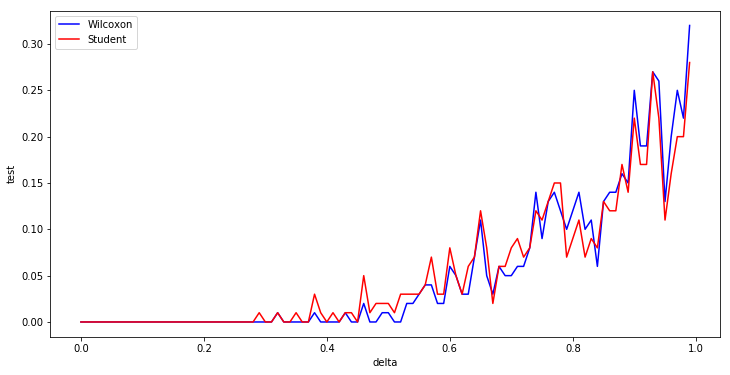

Sigma =  10


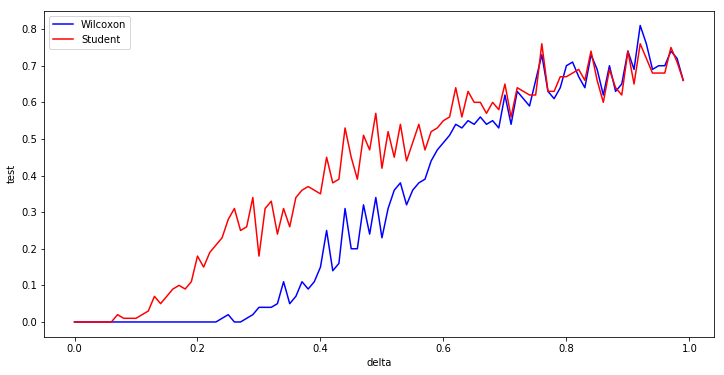

Sigma =  15


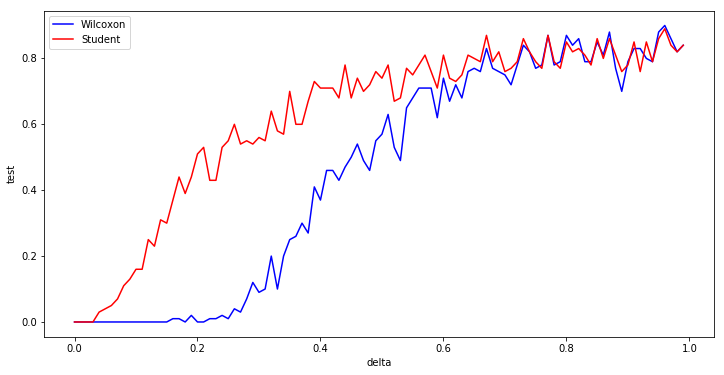

In [41]:
n = 100
alfa = 0.05
def generation(m, sigma, delta): # генерация массивов u,v,w
    S = []
    U = np.random.normal(m, 1, n)
    V = np.random.normal(m, sigma, n)
    W = np.random.uniform(0, 1, n)
    for i in range(n):
        if(W[i] > delta):
            S.append(U[i])
        else:
            S.append(V[i])
    return(S)

for sigma in range(5, 16, 5):
    print('Sigma = ', sigma)
    delta_list = []
    s_list = []
    w_list = []
    for i in range(n):
        tmp_s = 0
        tmp_w = 0
        delta = i/n
        delta_list.append(delta)
        # генерация выборок X и Y
        for j in range (n):
            X = generation(0, sigma, delta)
            Y = generation(2, sigma, delta)
            st_s, p_s = stat.ttest_ind(X, Y) # критерий Стьюдента
            if(p_s > alfa):
                tmp_s = tmp_s + 1
            st_w, p_w = stat.wilcoxon(X, Y) # критерий Уилкоксона
            if(p_w > alfa):
                tmp_w = tmp_w +1
        s_list.append(tmp_s/n)
        w_list.append(tmp_w/n)
    plt.figure(figsize=(12,6))
    plt.plot(delta_list, w_list, color = 'blue', label='Wilcoxon')
    plt.plot(delta_list, s_list, color = 'red', label='Student')
    plt.legend()
    plt.xlabel('delta')
    plt.ylabel('test')
    plt.show()

Delta =  0.2


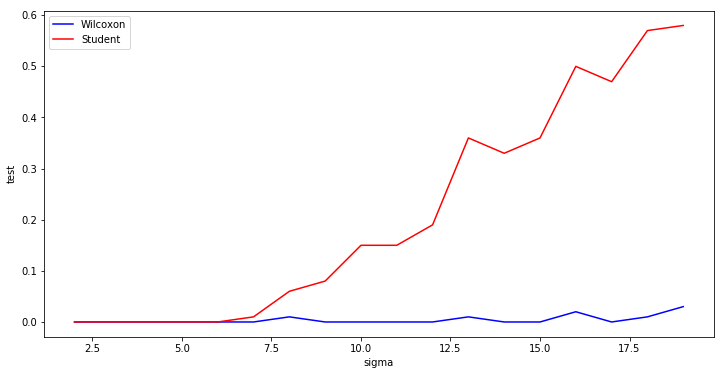

Delta =  0.3


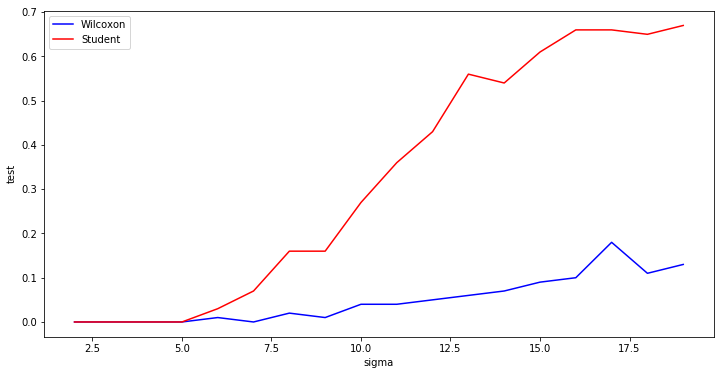

Delta =  0.4


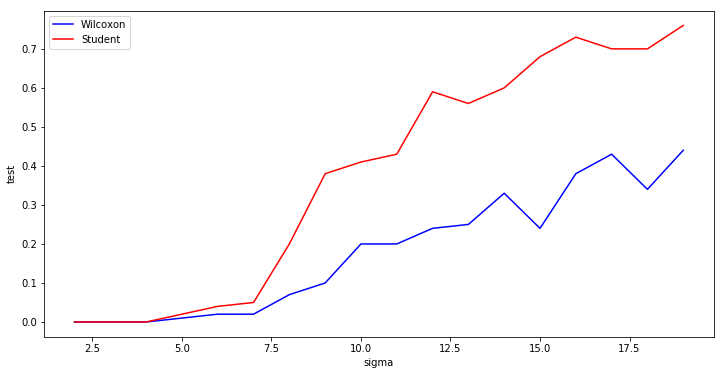

In [53]:
for i in range(2, 5):
    delta = i/10
    print('Delta = ', delta)
    sigma_list = []
    s_list = []
    w_list = []
    for sigma in range(2, 20):
        tmp_s = 0
        tmp_w = 0
        sigma_list.append(sigma)
        # генерация выборок X и Y
        for j in range (n):
            X = generation(0, sigma, delta)
            Y = generation(2, sigma, delta)
            st_s, p_s = stat.ttest_ind(X, Y) # критерий Стьюдента
            if(p_s > alfa):
                tmp_s = tmp_s + 1
            st_w, p_w = stat.wilcoxon(X, Y) # критерий Уилкоксона
            if(p_w > alfa):
                tmp_w = tmp_w +1
        s_list.append(tmp_s/n)
        w_list.append(tmp_w/n)
    plt.figure(figsize=(12,6))
    plt.plot(sigma_list, w_list, color = 'blue', label='Wilcoxon')
    plt.plot(sigma_list, s_list, color = 'red', label='Student')
    plt.legend()
    plt.xlabel('sigma')
    plt.ylabel('test')
    plt.show()